In [14]:
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.image as mpimg
from matplotlib import pyplot as pp
import matplotlib.colors as mcolors
import requests
from bs4 import BeautifulSoup


#        IMPORTO I FILE GIA' PULITI CON IL FILE 'pulire.py'
#                               |
#                               |
#                               V
file_comuni='./comuni_clean.csv'
file_rip='./ripartizioni_clean.csv'
file_prov='./province_clean.csv'
file_reg='./regioni_clean.csv'

comuni_clean=pd.read_csv(file_comuni)
ripartizioni_clean=pd.read_csv(file_rip)
province_clean=pd.read_csv(file_prov)
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
comuni_clean=comuni_clean.drop('Unnamed: 0', axis=1)
ripartizioni_clean=ripartizioni_clean.drop('Unnamed: 0', axis=1)
province_clean=province_clean.drop('Unnamed: 0', axis=1)
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)

# cancello le colonne che si erano andate a creare durante l'esportazione del dataset (colonne indice automaticamente generate quando vengono importati i dataset all'interno di dataframe)

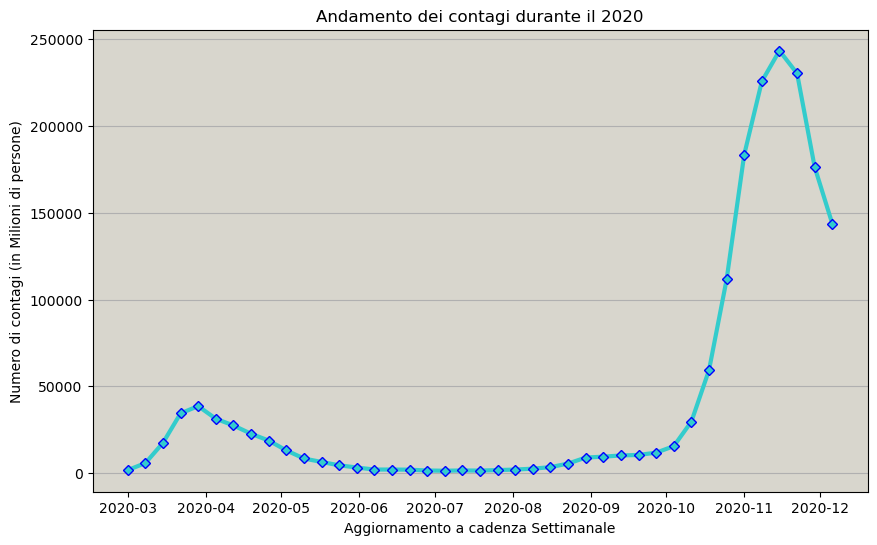

In [15]:
#imposto la colonna Date come formato data, cosìcché il dato venga interpretato come tale e si possano fare i calcoli temporali.
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)
regioni_clean.set_index('Date', inplace=True)
#mi calcolo il complessivo dei contagiati settimanali settimana per settimana, dato che nella colonna total avevamo dei totali già sommati e quindi avrebbero dato una linea sempre crescente.
#andando a sommare invece i new positive cases, ovvero i positivi relativi solo a quel giorno, ottengo un dato significativo, che mi mostra l'andamento dei contagi.
andamento_contagi= regioni_clean.resample('W')['NewPositiveCases'].sum().reset_index()
pp.figure(figsize=(10,6))
pp.gca().set_facecolor('#D8D6CD')
pp.plot(andamento_contagi['Date'],andamento_contagi['NewPositiveCases'], color='#33CCCC', linewidth=3, marker='D', markersize=5, markeredgecolor='b')
pp.grid(which='major', axis='y')
pp.title('Andamento dei contagi durante il 2020')
pp.xlabel('Aggiornamento a cadenza Settimanale')
pp.ylabel('Numero di contagi (in Milioni di persone)')
pp.show()

          Date  NewPositiveCases  Deaths  nuovi_morti
120 2020-06-23               122   34675           18
121 2020-06-24               190   34644          -31
122 2020-06-25               296   34678           34
123 2020-06-26               259   34708           30
124 2020-06-27               175   34716            8
125 2020-06-28               174   34738           22
126 2020-06-29               126   34744            6
127 2020-06-30               142   34767           23
128 2020-07-01               187   34788           21
129 2020-07-02               201   34818           30
130 2020-07-03               223   34833           15
131 2020-07-04               235   34854           21
132 2020-07-05               192   34861            7
133 2020-07-06               208   34869            8
134 2020-07-07               138   34899           30
135 2020-07-08               193   34914           15
136 2020-07-09               229   34926           12
137 2020-07-10              

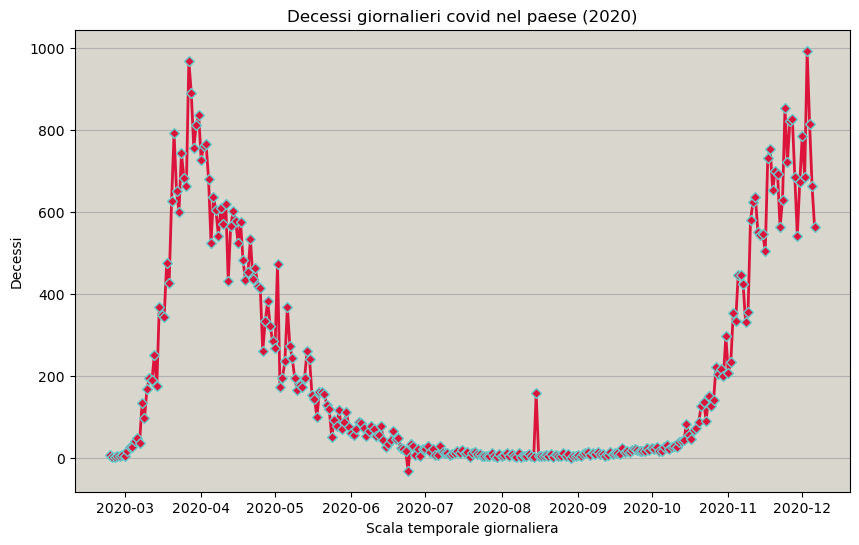

In [16]:
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)

regioni_clean.set_index('Date', inplace=True)
#vado a raggruppare per giorno i morti, così che ottengo giorno per giorno i morti di quel giorno. Dopodiché, creo una nuova colonna: nuovi_morti e la inserisco all'interno di un ciclo for,
#dove gli assegnerò ogni volta il valore dei morti nel giorno x - il valore dei morti nel giorno prima di x, così da ottenere un dato puntuale giorno dopo giorno dei nuovi morti
contagimorti_giornalieri=regioni_clean.resample('D')[['NewPositiveCases','Deaths']].sum().reset_index()
contagimorti_giornalieri['nuovi_morti']=0
#la colonna 3 è la nuova colonna che abbiamo creato, mentre la 2 è la colonna dei morti complessivi del giorno, nel caso in cui i è 0, non abbiamo un dato precedente, quindi i nuovi morti saranno i morti stessi
#di quel giorno. 
for i in range(0, 287):
        if i==0:
                contagimorti_giornalieri.iloc[i,3]=contagimorti_giornalieri.iloc[i,2]
        else:
                contagimorti_giornalieri.iloc[i,3]=contagimorti_giornalieri.iloc[i,2]-contagimorti_giornalieri.iloc[(i-1),2]
    
    
print(contagimorti_giornalieri.iloc[120:160, :])

#creo un normale grafico a linee, dove mi vado a vedere quanti morti ho giornalmente durante il periodo feb-dic 2020
pp.figure(figsize=(10, 6))
pp.gca().set_facecolor('#D8D6CD')
pp.plot(contagimorti_giornalieri.iloc[:,0],contagimorti_giornalieri.iloc[:,3], color='crimson', linewidth=2, marker='D', markersize=5, markeredgecolor='#66CCCC')
pp.grid(which='major', axis='y')
pp.title('Decessi giornalieri covid nel paese (2020)')
pp.xlabel('Scala temporale giornaliera')
pp.ylabel('Decessi')
pp.show()

In [17]:
# top 10 province per casi positivi
#raggruppiamo per nome di provincia prendendo il valore massimo e quindi quello finale dei total
Total_Positive_Cases_province = province_clean.groupby('ProvinceName')['TotalPositiveCases'].max()
sorted_province = Total_Positive_Cases_province.sort_values(ascending=False) #li mettiamo in ordine decrescente
top_10_province = sorted_province.head(10)#ci prendiamo i primi 10 con la head
print("Le dieci province con il maggior tasso di pazienti positivi sono:")
print(top_10_province)
# Creazione del grafico con colori diversi per ciascuna provincia, dopo aver creato una lista con le head 10 province
province = top_10_province.index
total_cases = top_10_province.values
pp.figure(figsize=(10,6))
pp.gca().set_facecolor('#D8D6CD')
colors = ['#330099', '#4B0082', '#0000FF', '#0066CC', '#0099FF', '#33CCCC', '#66CCCC', '#99CCFF', '#CCFFFF', '#E6FFFF']
for i in range(len(province)):
    pp.bar(province[i], total_cases[i], color=colors[i], label=province[i], align='edge')
pp.title("Top 10 Province per Casi Positivi")
pp.xlabel("Provincia")
pp.ylabel("Casi Positivi")
pp.xticks(rotation=45)
pp.grid(which='major', axis='y')
pp.legend()
pp.show()

Le dieci province con il maggior tasso di pazienti positivi sono:
ProvinceName
Milano                   158717
Napoli                   102702
Roma                      96985
Torino                    94349
Varese                    45944
Monza e della Brianza     44603
Brescia                   36010
Treviso                   31952
Genova                    31864
Padova                    31073
Name: TotalPositiveCases, dtype: int64


Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono:
RegionName
Lombardia         13328
Piemonte           5618
Emilia-romagna     4310
Name: TotalHospitalizedPatients, dtype: int64


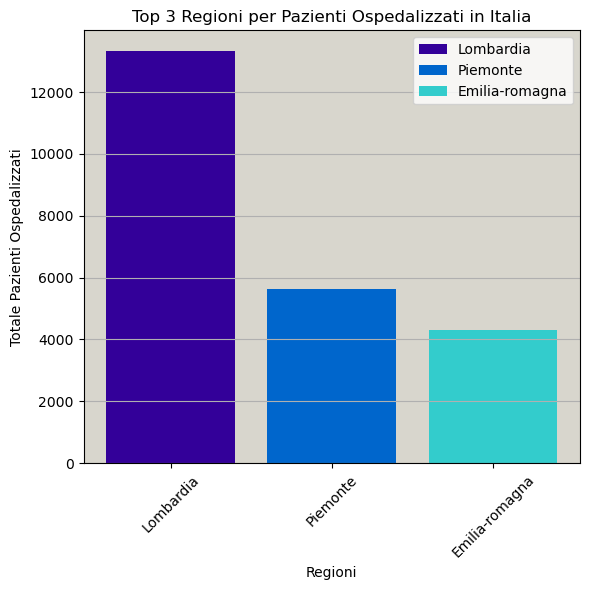

In [18]:
#            TOP 3 REGIONI PER PAZIENTI OSPEDALIZZATI 
#                               |
#                               |
#                               V
#Raggruppo per regione, i pazienti ospedalizzati e li sommo. 
total_hospitalized_by_region = regioni_clean.groupby('RegionName')['TotalHospitalizedPatients'].max()
sorted_regions = total_hospitalized_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono:")
print(top_3_regions)
# Crea il grafico, andando a selezionare le head 3
region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values
pp.figure(figsize=(6, 6))
pp.gca().set_facecolor('#D8D6CD')
#metto 3 colori dal più chiaro al più scuro
colors = ['#330099', '#0066CC', '#33CCCC']
for i in range(0,3):
    pp.bar(region_names[i], total_hospitalized_counts[i], color=colors[i], label=region_names[i])
pp.xlabel('Regioni')
pp.ylabel('Totale Pazienti Ospedalizzati')
pp.title('Top 3 Regioni per Pazienti Ospedalizzati in Italia')
pp.xticks(rotation=45)
pp.tight_layout()
pp.grid(which='major', axis='y')
pp.legend()
pp.show()


Le tre regioni con il maggior tasso di pazienti guariti sono:
RegionName
Lombardia    289706
Piemonte     105127
Veneto        84235
Name: Recovered, dtype: int64


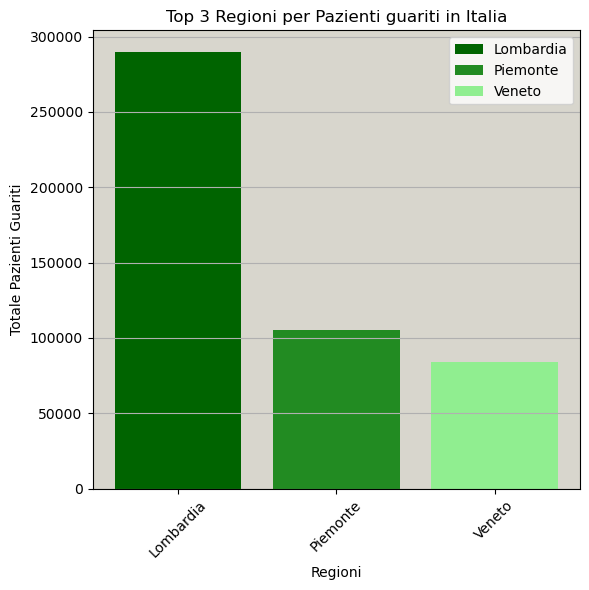

In [19]:
#TOP 3 regioni con maggior numero di pazienti guariti
total_Recovered_by_region = regioni_clean.groupby('RegionName')['Recovered'].max()
sorted_regions = total_Recovered_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti guariti sono:")
print(top_3_regions)
region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values
pp.figure(figsize=(6, 6))
pp.gca().set_facecolor('#D8D6CD')
colors=['#006400','#228B22','#90EE90']
for i in range(0,3):
    pp.bar(region_names[i], total_hospitalized_counts[i], color=colors[i], label=region_names[i])

pp.xlabel('Regioni')
pp.ylabel('Totale Pazienti Guariti')
pp.title('Top 3 Regioni per Pazienti guariti in Italia')
pp.xticks(rotation=45)
pp.grid(which='major', axis='y')
pp.legend()
pp.tight_layout()
pp.show()

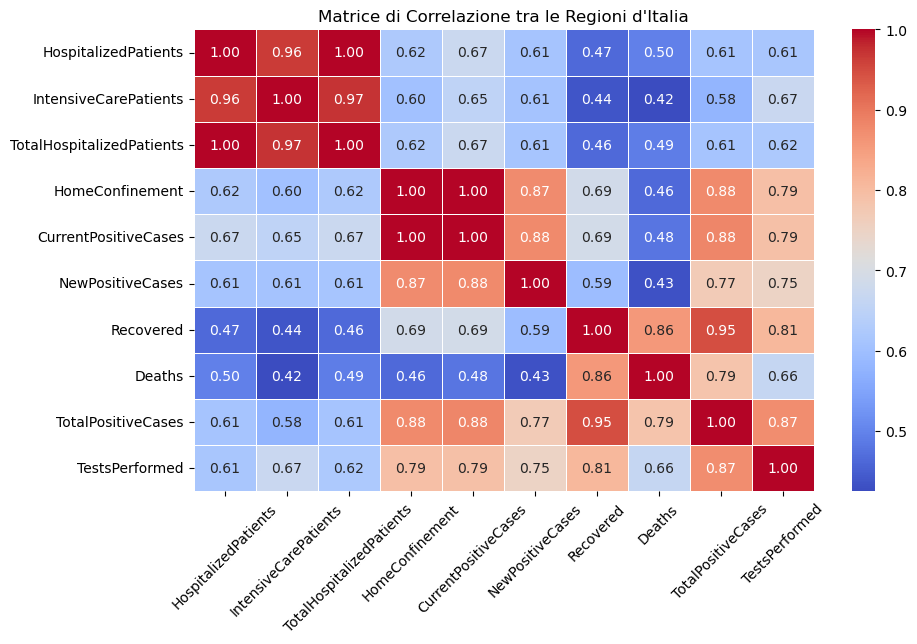

In [20]:
#           MATRICE DI CORRELAZIONE TRA I DATI DEI CONTAGI
#                               |
#                               |
#                               V
colonne_numeriche = regioni_clean.select_dtypes(include='number')
corr_matrix = colonne_numeriche.corr()
corr_matrix = corr_matrix.iloc[4:, 4:]
pp.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
pp.title('Matrice di Correlazione tra le Regioni d\'Italia')
pp.xticks(rotation=45)
pp.show()

In [21]:
#                                                      ESISTERA' UNA CORRELAZIONE TRA POVERTA' E MORTE DURANTE LA PANDEMIA (2020)?
#                                                                                         |
#                                                                                         |
#                                                                                         V
# Per poterlo costatare dobbiamo in primo luogo importarci un nuovo dataset, che ci mostra gli indici percentuali di povertà, intendendo il numero di persone sottostanti la soglia di povertà.
# In questo caso prendiamo il dato del 2020 --> il dataset risultava pieno di righe non utili all'analisi e di minuscole/minuscole trattini, nel campo regione, che sono stai puliti ed equiparati
# ai nomi di regione usati negli altri dataset. Dopodiché, dopo aver effettuato la pulizia esportiamo il dataset in un nuovo dataset 'poveri_regione_clean.csv'
# D'altro vogliamo capire quanti morti ogni 100 mila abitanti ci sono stati nelle varie regioni. Per saperlo, abbiamo bisogno di 2 dati --> gli abitanti di ogni regione, che otteniamo sommando 
# per regione gli abitanti dei singoli comuni dal file 'comuni_clean.csv' e nella tabella regioni_clean prendiamo il max dei morti nella regione (il max corrisponde al dato ultimo e più aggiornato)
# del dataset, che racchiude i morti complessivi del 2020 di covid-19 fino a quel momento

#IMPORTO LA TABELLA CON GLI INDICI DI POVERTA', RIMUOVENDO LA SOLITA COLONNA CREATASI DOPO L'ESPORTAZIONE DEL FILE PULITO
poveri_regione=pd.read_csv('./poveri_regione_clean.csv')
poveri_regione=poveri_regione.drop(['Unnamed: 0'], axis=1)

#CONVERTO LA COLONNA POPOLAZIONE2011 CHE RISULTAVA STRINGA, IN NUMERO
comuni_clean['Popolazione2011'] = pd.to_numeric(comuni_clean['Popolazione2011'])

#OTTENGO GLI ABITANTI DI OGNI REGIONE COME SOMMA DEGLI ABITANTI DEI SINGOLI COMUNI APPARTENENTI A QUELLA DET. REGIONE
abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum()

#PRENDO IL VALORE PIU' AGGIORNATO DI MORTI ALL'INTERNO DELLA REGIONE
regioni_raggruppate=regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()

#FACCIO UNA PRIMA MERGE TRA INDICE DI POVERTA' E MORTI
join_poveri_covidcase = pd.merge(poveri_regione, regioni_raggruppate, left_on='Territorio', right_on='RegionName', how='inner')
#print(abitanti_regione)
#print(join_poveri_covidcase['Territorio'])

#FACCIO LA SECONDA MERGE, PER POTER AVERE DISPONIBILE IL TOTALE ABITANTI DELLA REGIONE --> COSì POSSO FARE IL RAPPORTO DEATHS/100K ABITANTI
complessivo_contagi=pd.merge(join_poveri_covidcase, abitanti_regione, left_on='Territorio', right_on='Regione', how='inner')
print(complessivo_contagi)

pp.figure(figsize=(10,6))
pp.gca().set_facecolor('#D8D6CD')

pp.plot(complessivo_contagi['Territorio'],(complessivo_contagi['Deaths']/complessivo_contagi['Popolazione2011'].sum())*100000, color='crimson',linewidth=5, label='morti ogni 100k abitanti', marker='*', markersize=10)
pp.bar(complessivo_contagi['Territorio'],complessivo_contagi['Osservazione'], color='#310062', label='indice % di poverta')
pp.xticks(rotation=90)
pp.title('La povertà è causa di morte in pandemia?')
pp.ylabel('Morti ogni 100k abitanti vs. Indice poverta')
pp.grid(which='major', axis='y')
pp.legend()
pp.show()





                      Territorio  Osservazione                    RegionName  \
0                       Piemonte           8.9                      Piemonte   
1                  Valle d'aosta           6.3                 Valle d'aosta   
2                        Liguria          10.6                       Liguria   
3                      Lombardia           9.0                     Lombardia   
4   Trentino-Alto Adige/sudtirol           4.8  Trentino-Alto Adige/sudtirol   
5                         Veneto           8.0                        Veneto   
6          Friuli-Venezia giulia           7.8         Friuli-Venezia giulia   
7                 Emilia-romagna           7.6                Emilia-romagna   
8                        Toscana           7.8                       Toscana   
9                         Umbria          10.8                        Umbria   
10                        Marche          14.6                        Marche   
11                         Lazio        

                  Regione  Popolazione2011  Superficie     densita  \
0                 abruzzo        1307309.0    10831.50  120.695102   
1              basilicata         578036.0    10073.11   57.384065   
2                calabria        1959050.0    15221.61  128.701892   
3                campania        5766810.0    13670.60  421.840300   
4          emilia-romagna        4342135.0    22501.43  192.971513   
5   friuli-venezia giulia        1220291.0     7932.48  153.834740   
6                   lazio        5502886.0    17231.72  319.346299   
7                 liguria        1570694.0     5416.15  290.001939   
8               lombardia        9704151.0    23863.10  406.659277   
9                  marche        1541319.0     9344.29  164.947685   
10                 molise         313660.0     4460.44   70.320417   
11               piemonte        4363916.0    25386.70  171.897726   
12                 puglia        4052566.0    19540.52  207.392946   
13               sar

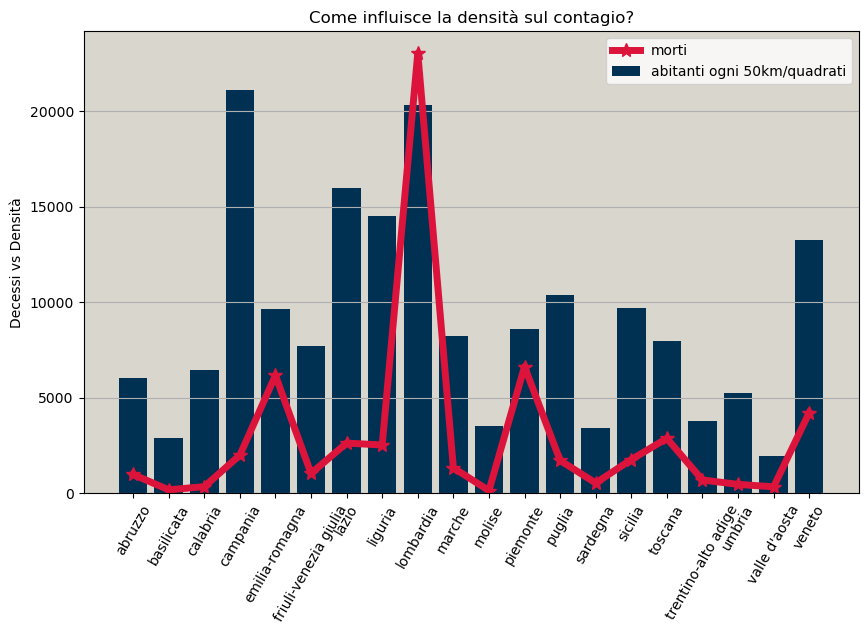

In [22]:
# URL del sito web
url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'
# Effettua una richiesta GET al sito
response = requests.get(url)
# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')
    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})
    # Inizializza una lista per memorizzare i dati
    data = []
    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip()  # Assumendo che la superficie sia nella quarta colonna
        data.append([regione, superficie])  
    # Crea un DataFrame pandas
    df = pd.DataFrame(data, columns=['Regione', 'Superficie'])
    # Stampa il DataFrame
    #print(df)
else:
    print('Errore nella richiesta HTTP')

#superficie espressa in km^2.
regioni_raggruppate=regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()

abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum().reset_index()
abitanti_regione['Regione']=abitanti_regione['Regione'].str.lower() #dava problemi in fase di merge per problemi di maiuscole, fatti anche nelle stringhe successivamente gli aggiustamenti di
#maiuscole, minuscole e conversione dei tipi
abitanti_regione['Regione'] = abitanti_regione['Regione'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
df['Regione']=df['Regione'].str.lower()
df['Superficie'] = df['Superficie'].str.replace(',', '.').str.replace(r'\s+', '', regex=True).astype(float)
calcolo_densita=pd.merge(abitanti_regione, df, left_on='Regione', right_on='Regione')
calcolo_densita['Superficie']=calcolo_densita['Superficie'].astype(float)
calcolo_densita['densita']=calcolo_densita['Popolazione2011']/calcolo_densita['Superficie']
regioni_raggruppate['RegionName']=regioni_raggruppate['RegionName'].str.lower()
regioni_raggruppate['RegionName'] = regioni_raggruppate['RegionName'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
morti_densita=pd.merge(calcolo_densita, regioni_raggruppate, left_on='Regione', right_on='RegionName')
print(morti_densita)

pp.figure(figsize=(10,6))
pp.gca().set_facecolor('#D8D6CD')
#per 50 sulla densità, così da avere i morti ogni 50 km e la rappresentazione grafica, visualmente ottimale
pp.bar(morti_densita['Regione'],morti_densita['densita']*50, color='#003153', label='abitanti ogni 50km/quadrati')
pp.plot(morti_densita['Regione'],morti_densita['Deaths'], color='crimson',linewidth=5, marker='*', markersize=10, label='morti')
pp.xticks(rotation=60)
pp.title('Come influisce la densità sul contagio?')
pp.ylabel('Decessi vs Densità')
pp.grid(which='major', axis='y')
pp.legend()
pp.show()

regioni_somma_contagi                       RegionName  TotalPositiveCases
0                        Abruzzo               30274
1                     Basilicata                8940
2                       Calabria               18537
3                       Campania              165293
4                 Emilia-romagna              133761
5          Friuli-Venezia giulia               35467
6                          Lazio              130255
7                        Liguria               53779
8                      Lombardia              429109
9                         Marche               32393
10                        Molise                5286
11                      Piemonte              177788
12                        Puglia               64341
13                      Sardegna               24186
14                       Sicilia               71489
15                       Toscana              108397
16  Trentino-Alto Adige/sudtirol               25361
17                      

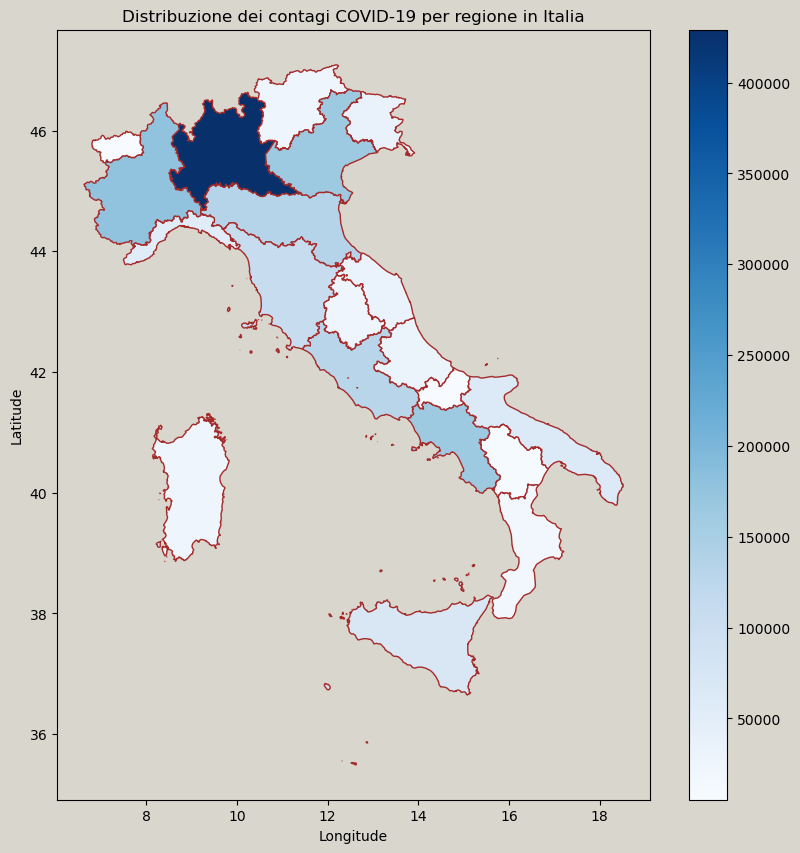

In [23]:
#CONTAGI Massimi
italy = gp.read_file("italy-with-regions_1458.geojson")
regioni_somma_contagi = regioni_clean.groupby('RegionName')['TotalPositiveCases'].max().reset_index()
print("regioni_somma_contagi", regioni_somma_contagi)
italy_with_cases = italy.merge(regioni_somma_contagi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='TotalPositiveCases', cmap='Blues', edgecolor='brown', legend=True, figsize=(10, 10))
pp.gca().set_facecolor('#D8D6CD')
pp.gcf().set_facecolor('#D8D6CD')
pp.title('Distribuzione dei contagi COVID-19 per regione in Italia')
pp.xlabel('Longitude')
pp.ylabel('Latitude')
pp.show()

regioni_decessi                       RegionName  Deaths
0                        Abruzzo     980
1                     Basilicata     175
2                       Calabria     343
3                       Campania    1990
4                 Emilia-romagna    6162
5          Friuli-Venezia giulia    1035
6                          Lazio    2622
7                        Liguria    2521
8                      Lombardia   23024
9                         Marche    1327
10                        Molise     135
11                      Piemonte    6623
12                        Puglia    1712
13                      Sardegna     531
14                       Sicilia    1759
15                       Toscana    2867
16  Trentino-Alto Adige/sudtirol     691
17                        Umbria     460
18                 Valle d'aosta     333
19                        Veneto    4210


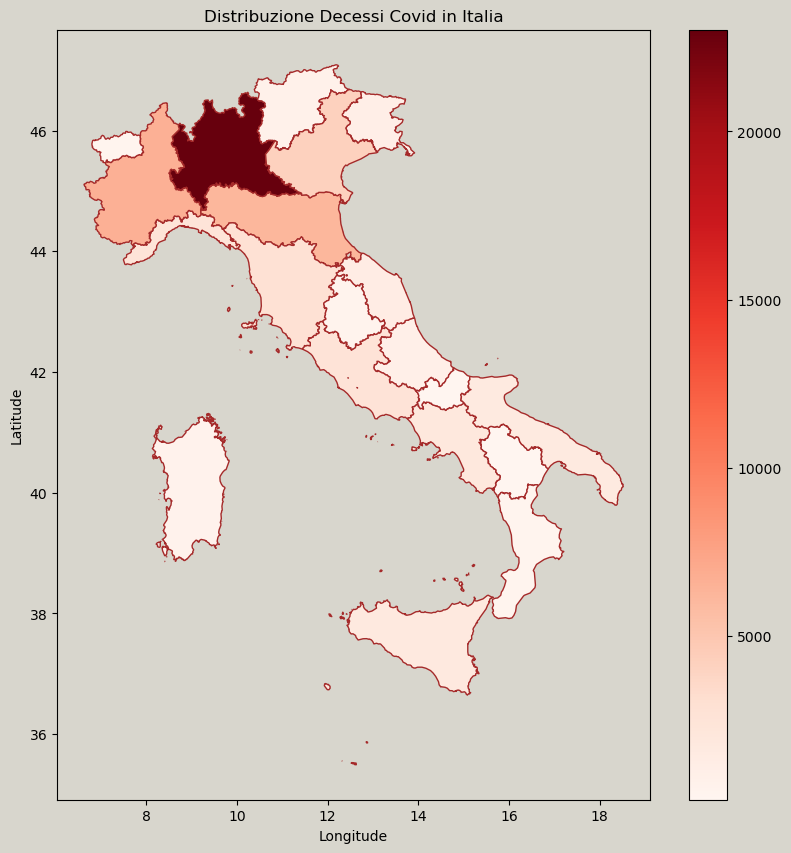

In [24]:
regioni_decessi = regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()
print("regioni_decessi", regioni_decessi)
italy_with_cases = italy.merge(regioni_decessi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Deaths', cmap='Reds', edgecolor='brown', legend=True, figsize=(10, 10))
pp.gca().set_facecolor('#D8D6CD')
pp.gcf().set_facecolor('#D8D6CD')
pp.title('Distribuzione Decessi Covid in Italia')
pp.xlabel('Longitude')
pp.ylabel('Latitude')
pp.show()

In [25]:
regioni_guariti = regioni_clean.groupby('RegionName')['Recovered'].max().reset_index()
print("regioni_guariti", regioni_guariti)
italy_with_cases = italy.merge(regioni_guariti, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Recovered', cmap='Greens', edgecolor='brown', legend=True, figsize=(10, 10))
pp.gca().set_facecolor('#D8D6CD')
pp.gcf().set_facecolor('#D8D6CD')
pp.title('Distribuzione Pazienti Covid Guariti  in Italia')
pp.xlabel('Longitude')
pp.ylabel('Latitude')
pp.show()

regioni_guariti                       RegionName  Recovered
0                        Abruzzo      12206
1                     Basilicata       2397
2                       Calabria       7533
3                       Campania      62060
4                 Emilia-romagna      59432
5          Friuli-Venezia giulia      19401
6                          Lazio      33422
7                        Liguria      40842
8                      Lombardia     289706
9                         Marche      11008
10                        Molise       2438
11                      Piemonte     105127
12                        Puglia      16795
13                      Sardegna       8695
14                       Sicilia      29984
15                       Toscana      76331
16  Trentino-Alto Adige/sudtirol      13995
17                        Umbria      18619
18                 Valle d'aosta       5406
19                        Veneto      84235


In [ ]:

#                   DI QUALE REGIONE VUOI LE INFO?
#                               |
#                               |
#                               V
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
Regione = str(input("Inserisci una Regione : "))
informazioni_regione = regioni_clean[regioni_clean['RegionName'] == Regione]
print(informazioni_regione[['Date','RegionName','TotalPositiveCases']][0:30])


In [ ]:
#DI QUALI REGIONI VUOI I COMUNI?

Regione = input("Inserisci una Regione: ")
comuni_regione = comuni_clean[comuni_clean['Regione'].str.contains(Regione, case=False, na=False)]['Denominazione'].drop_duplicates().tolist()
print(f"I comuni della regione '{Regione}' sono: {comuni_regione}")